Dieses Notebook visualisiert die Vorhersagen des letzen Modells sowie die Ground Truth Annotationen.

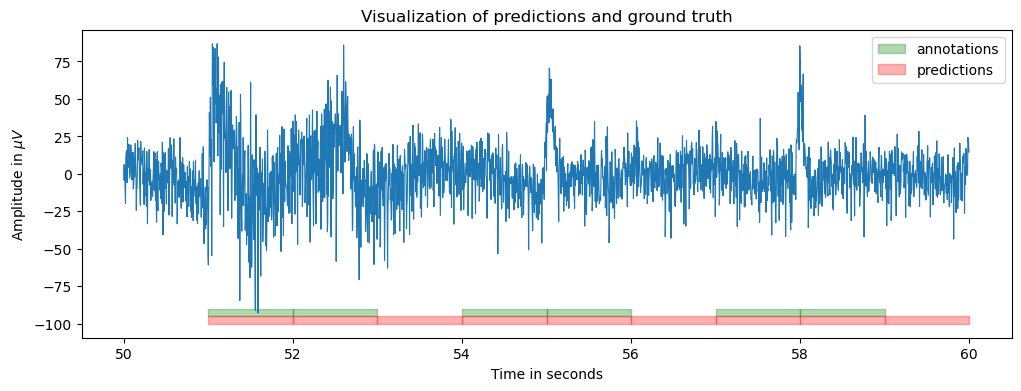

In [1]:
import h5py
import numpy as np
import pyedflib
import os
from utils.visualization import visualize_model_predictions
import joblib
from matplotlib import pyplot as plt

dataset_path = '../../../../tuar_processed'
feature_file = './features/features.hdf5'
recording = 'aaaaaezj_s007_t002'
channel = 'FP1-F7'
model_path = './models/16-11-25 12-23-07.joblib'
features = ['mean', 'variance', 'std', 'ptp_amp', 'kurtosis', 'quantile', 'pow_freq_bands', 'hurst_exp', 'line_length',
            'rms', 'higuchi_fd', 'spect_entropy', 'svd_entropy', 'teager_kaiser_energy', 'wavelet_coef_energy',
            'zero_crossings']
start = 50
stop = 60

fig, axes = plt.subplots(figsize=(12, 4))

with h5py.File(feature_file) as f:
    channel_group = f[recording][channel]
    feature_vector_list = []
    if not features:
        features = [feat for feat in channel_group.keys() if not feat == 'labels']
    for feature in features:
        feature_vector_list.append(channel_group[feature][:])
    feature_matrix = np.column_stack(feature_vector_list)
    y_true = channel_group['labels'][:]

recording_edf = recording + '.edf'

for root, dirs, files in os.walk(dataset_path):
    if recording_edf not in files:
        continue

    recording_edf_path = os.path.join(root, recording_edf)
    with pyedflib.EdfReader(recording_edf_path) as reader:
        channel_data = reader.readSignal(reader.getSignalLabels().index(channel))

clf = joblib.load(model_path)

y_pred = clf.predict(feature_matrix)

axes = visualize_model_predictions(axes, channel_data, y_true, y_pred, start, stop)
fig.savefig('output/exp_03_08_prediction_visualization_1.pdf', bbox_inches='tight')
fig.show()